In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("/Users/armeniphone/Downloads/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
count=data['cut'].value_counts()
count

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

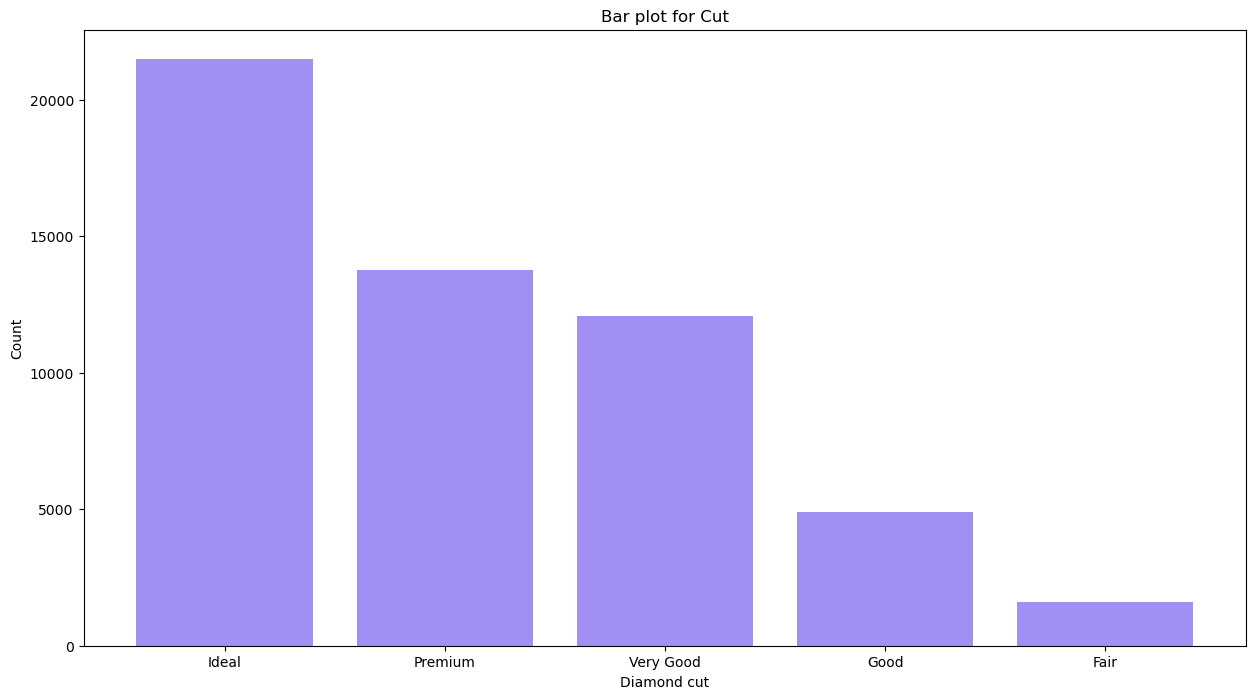

In [8]:
X = count.index
y = count.values

color = '#A28FF3'  

plt.figure(figsize=(15, 8))
plt.bar(X, y, color=color)

plt.title("Bar plot for Cut")
plt.xlabel("Diamond cut")
plt.ylabel("Count")

plt.show()

In [9]:
cut = data['color'].value_counts()

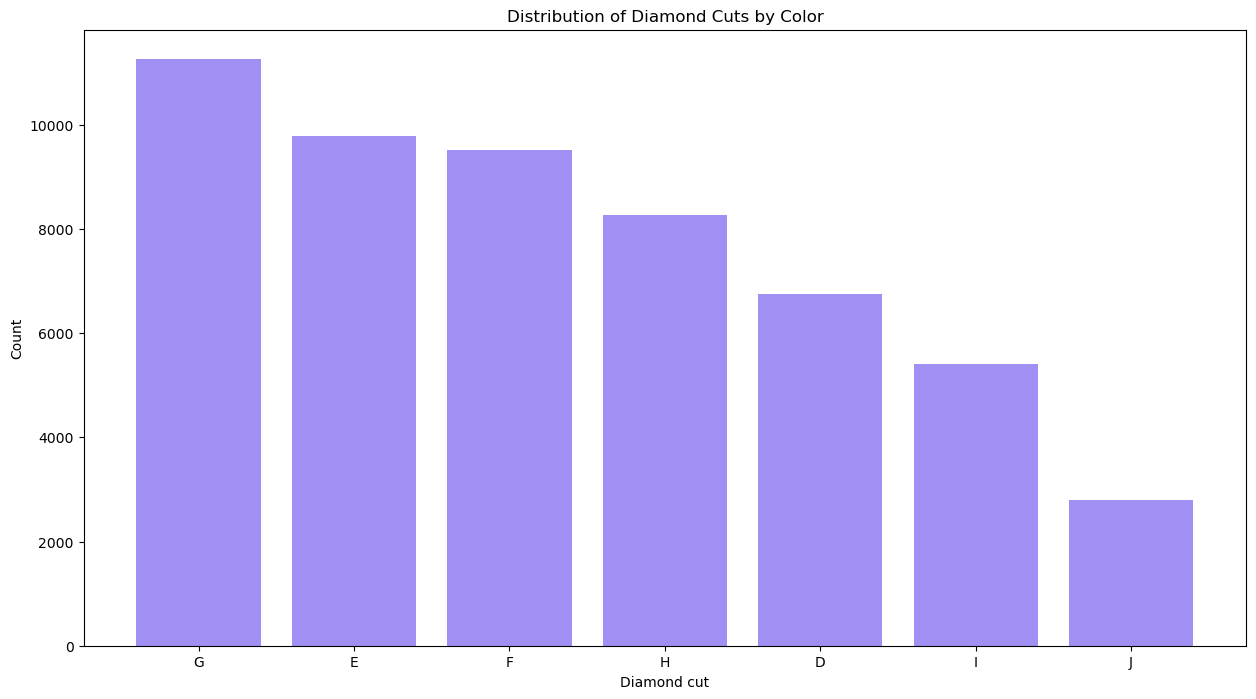

In [10]:
X = cut.index
y = cut.values

color = '#A28FF3'

plt.figure(figsize=(15, 8))
plt.bar(X, y, color=color)

plt.xlabel("Diamond cut")
plt.ylabel("Count")
plt.title("Distribution of Diamond Cuts by Color")

plt.show()

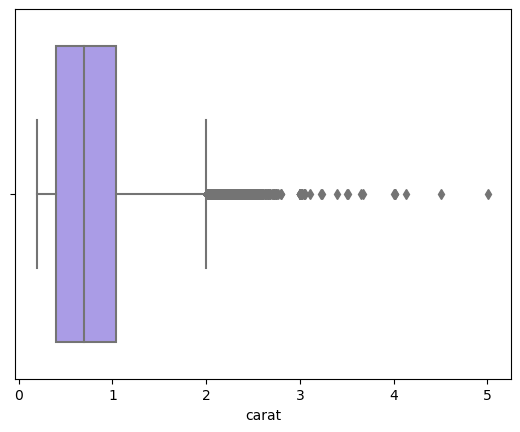

In [11]:
sns.boxplot(x=data['carat'], data=data, color='#A28FF3')

plt.show()

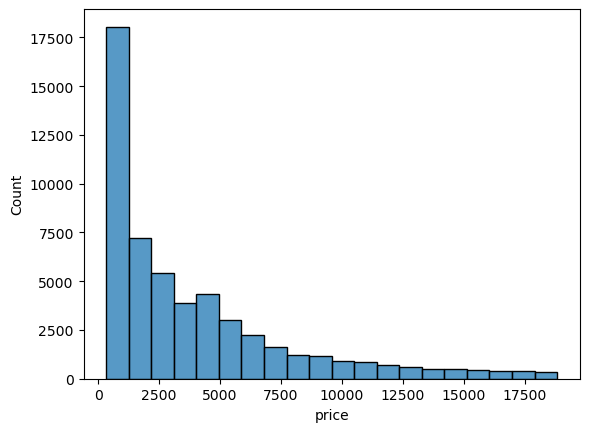

In [14]:
sns.histplot(data=data, x='price', bins=20)
plt.show()

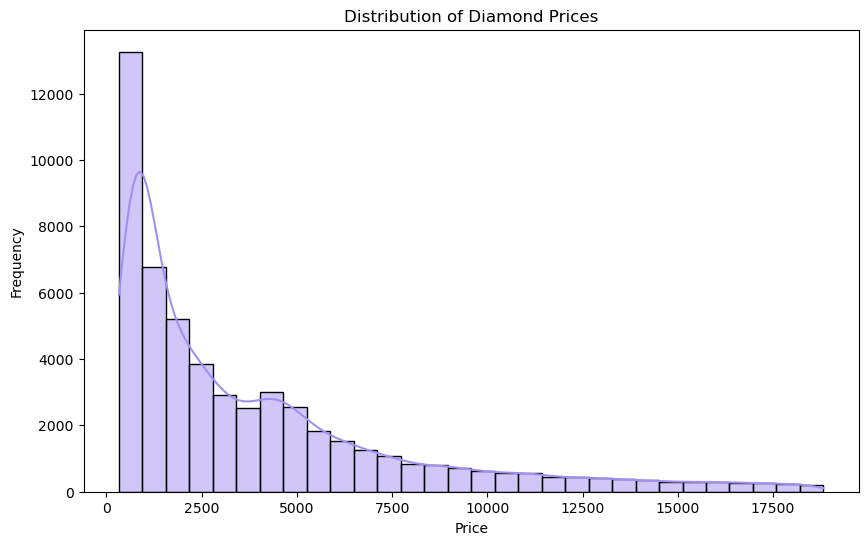

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='#A28FF3')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/Users/armeniphone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


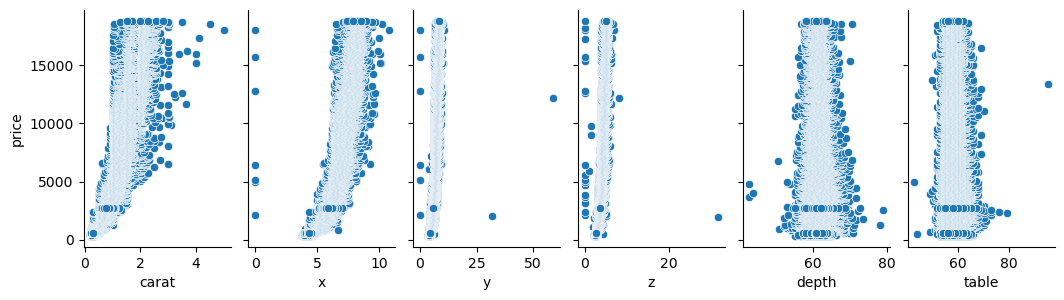

In [16]:
sns.pairplot(data, x_vars=['carat', 'x', 'y', 'z', 'depth', 'table'], y_vars=['price'], kind='scatter', height=3, aspect=0.6)
plt.show()

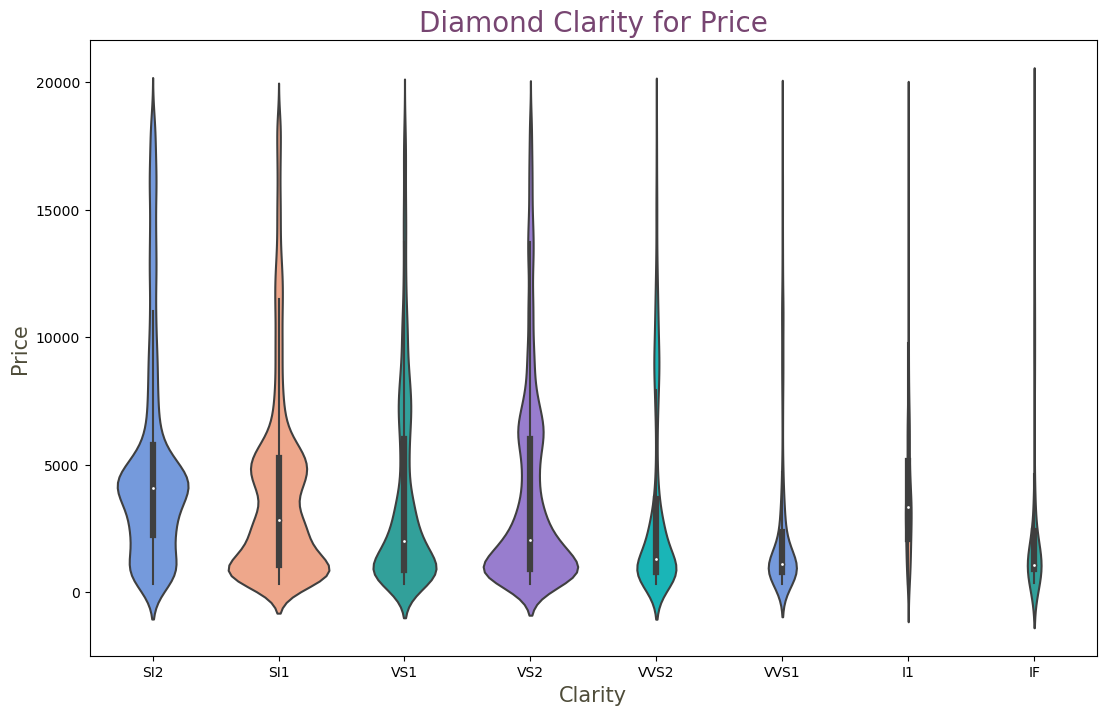

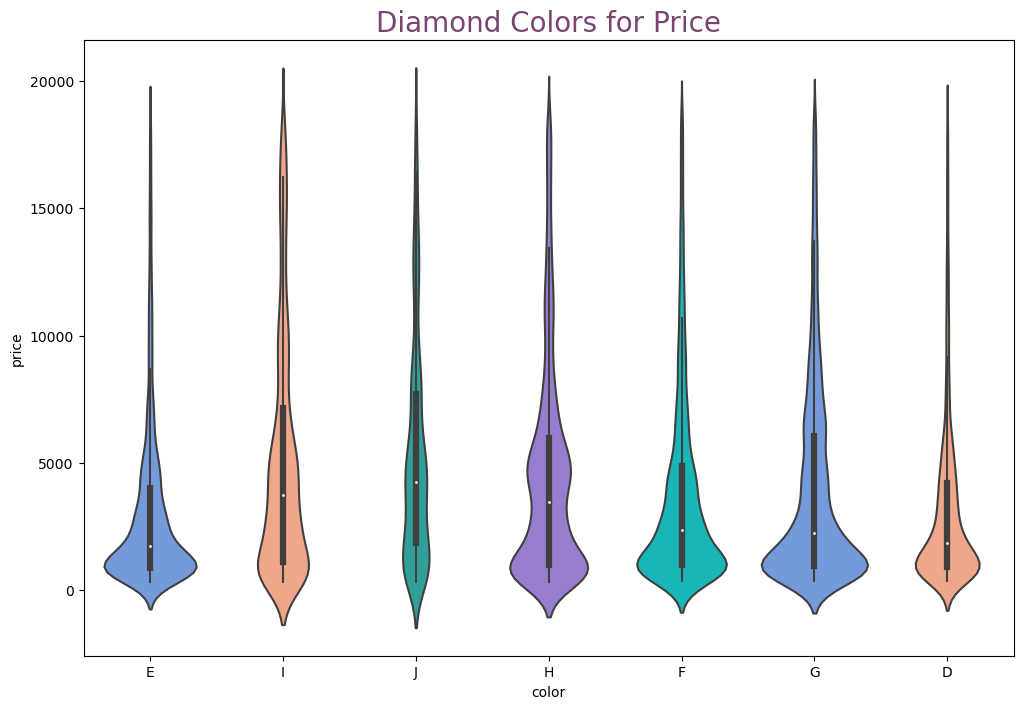

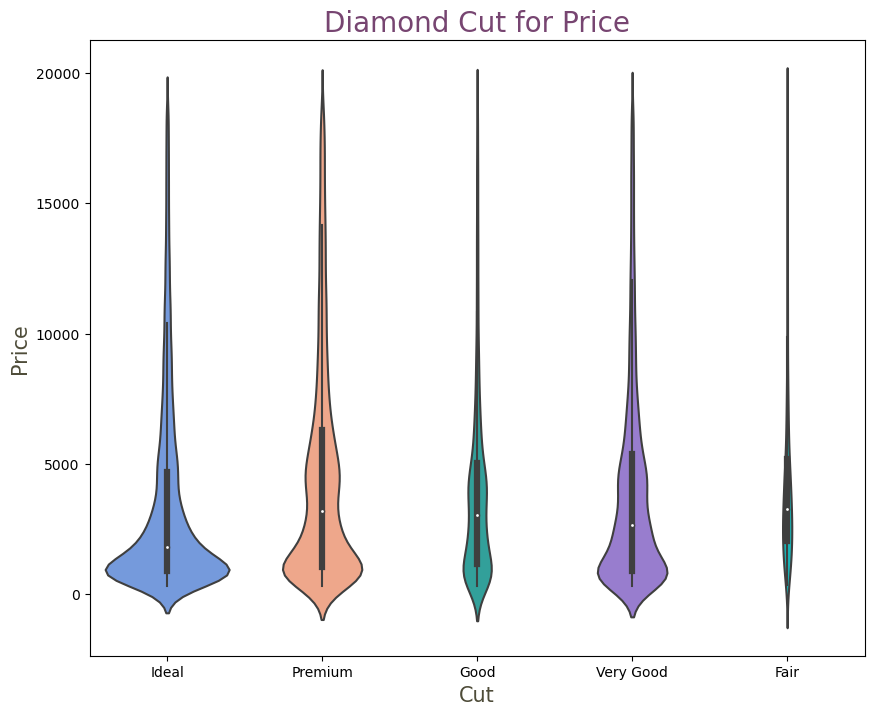

In [17]:
plt.figure(figsize=(13, 8))  # Set the figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # Different colors
ax = sns.violinplot(x="clarity", y="price", data=data, palette=cols, scale="count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize=20)
ax.set_ylabel("Price", color="#4e4c39", fontsize=15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))  # Set the figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # Different colors
ax = sns.violinplot(x="color", y="price", data=data, palette=cols, scale="count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize=20)

plt.figure(figsize=(10, 8))
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # Different colors
ax = sns.violinplot(x="cut", y="price", data=data, palette=cols, scale="count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize=20)
ax.set_ylabel("Price", color="#4e4c39", fontsize=15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize=15)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for i in data.columns:
    data[i] = labelencoder.fit_transform(data[i])

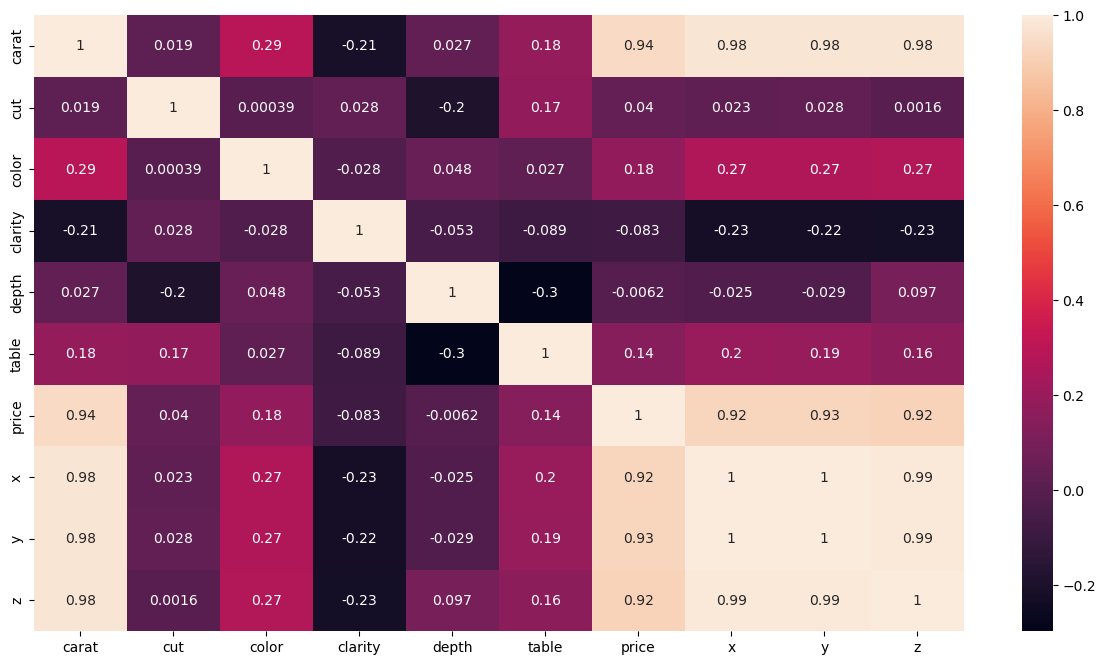

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

/Users/armeniphone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


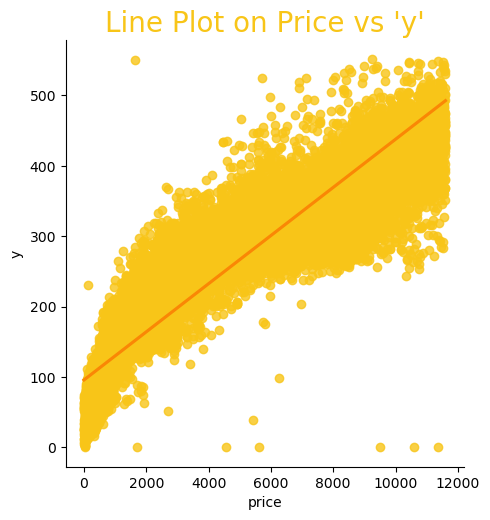

In [20]:
lm = sns.lmplot(x="price", y="y", data=data, scatter_kws={"color": "#F8C518"}, line_kws={"color": "#FA8705"})
plt.title("Line Plot on Price vs 'y'", color="#F8C518", fontsize = 20)
plt.show()

In [21]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.018530,0.291197,-0.213544,0.027486,0.184948,0.940740,0.978202,0.977234,0.975158
cut,0.018530,1.000000,0.000393,0.028141,-0.195271,0.174226,0.040175,0.022624,0.028420,0.001572
color,0.291197,0.000393,1.000000,-0.028002,0.048296,0.026836,0.177752,0.270196,0.269890,0.274013
clarity,-0.213544,0.028141,-0.028002,1.000000,-0.053243,-0.089449,-0.083332,-0.225607,-0.222671,-0.228899
depth,0.027486,-0.195271,0.048296,-0.053243,1.000000,-0.297335,-0.006197,-0.025342,-0.028513,0.096599
table,0.184948,0.174226,0.026836,-0.089449,-0.297335,1.000000,0.141247,0.198383,0.192375,0.158236
price,0.940740,0.040175,0.177752,-0.083332,-0.006197,0.141247,1.000000,0.924586,0.925995,0.918740
x,0.978202,0.022624,0.270196,-0.225607,-0.025342,0.198383,0.924586,1.000000,0.998458,0.989743
y,0.977234,0.028420,0.269890,-0.222671,-0.028513,0.192375,0.925995,0.998458,1.000000,0.989451
z,0.975158,0.001572,0.274013,-0.228899,0.096599,0.158236,0.918740,0.989743,0.989451,1.000000


/Users/armeniphone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


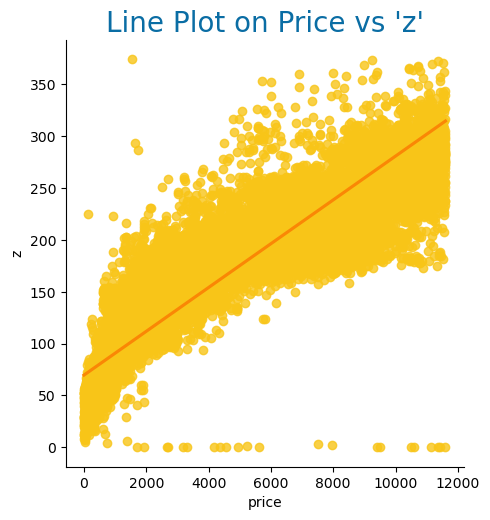

In [22]:

lm = sns.lmplot(x="price", y="z", data=data, scatter_kws={"color": "#F8C518"}, line_kws={"color": "#FA8705"})
plt.title("Line Plot on Price vs 'z'", color="#0a6da4", fontsize = 20)
plt.show()

In [23]:
data.corr(method='pearson')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.018530,0.291197,-0.213544,0.027486,0.184948,0.940740,0.978202,0.977234,0.975158
cut,0.018530,1.000000,0.000393,0.028141,-0.195271,0.174226,0.040175,0.022624,0.028420,0.001572
color,0.291197,0.000393,1.000000,-0.028002,0.048296,0.026836,0.177752,0.270196,0.269890,0.274013
clarity,-0.213544,0.028141,-0.028002,1.000000,-0.053243,-0.089449,-0.083332,-0.225607,-0.222671,-0.228899
depth,0.027486,-0.195271,0.048296,-0.053243,1.000000,-0.297335,-0.006197,-0.025342,-0.028513,0.096599
table,0.184948,0.174226,0.026836,-0.089449,-0.297335,1.000000,0.141247,0.198383,0.192375,0.158236
price,0.940740,0.040175,0.177752,-0.083332,-0.006197,0.141247,1.000000,0.924586,0.925995,0.918740
x,0.978202,0.022624,0.270196,-0.225607,-0.025342,0.198383,0.924586,1.000000,0.998458,0.989743
y,0.977234,0.028420,0.269890,-0.222671,-0.028513,0.192375,0.925995,0.998458,1.000000,0.989451
z,0.975158,0.001572,0.274013,-0.228899,0.096599,0.158236,0.918740,0.989743,0.989451,1.000000


In [24]:
data.corr(method='spearman')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.038985,0.249350,-0.216114,0.030288,0.194166,0.962924,0.996161,0.995614,0.993255
cut,0.038985,1.000000,0.006107,0.005530,-0.126392,0.288322,0.038223,0.042955,0.045175,0.021334
color,0.249350,0.006107,1.000000,-0.023260,0.049133,0.027601,0.149673,0.245138,0.244995,0.250576
clarity,-0.216114,0.005530,-0.023260,1.000000,-0.052357,-0.085086,-0.115903,-0.214218,-0.212105,-0.217314
depth,0.030288,-0.126392,0.049133,-0.052357,1.000000,-0.245194,0.010181,-0.023273,-0.025247,0.103651
table,0.194166,0.288322,0.027601,-0.085086,-0.245194,1.000000,0.171025,0.201466,0.194952,0.159105
price,0.962924,0.038223,0.149673,-0.115903,0.010181,0.171025,1.000000,0.963260,0.962788,0.957309
x,0.996161,0.042955,0.245138,-0.214218,-0.023273,0.201466,0.963260,1.000000,0.997893,0.987366
y,0.995614,0.045175,0.244995,-0.212105,-0.025247,0.194952,0.962788,0.997893,1.000000,0.987081
z,0.993255,0.021334,0.250576,-0.217314,0.103651,0.159105,0.957309,0.987366,0.987081,1.000000


/Users/armeniphone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


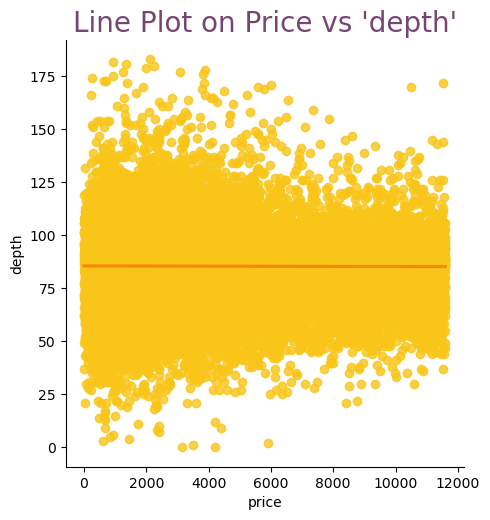

In [25]:
lm = sns.lmplot(x="price", y="depth", data=data, scatter_kws={"color": "#F8C518"}, line_kws={"color": "#FA8705"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

/Users/armeniphone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


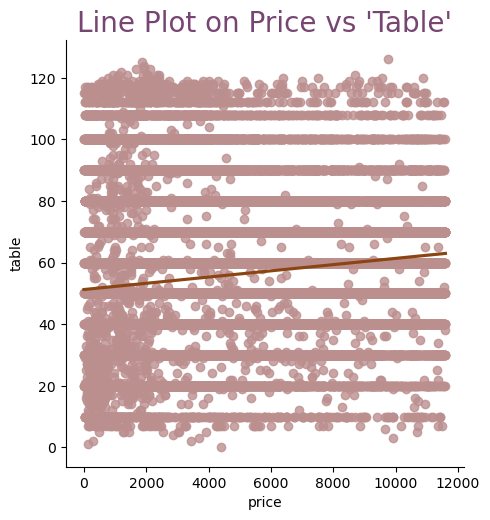

In [26]:
lm = sns.lmplot(x="price", y="table", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [27]:
df = sns.load_dataset('diamonds')

In [28]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [29]:
contingency_table = pd.crosstab(df['color'], df['clarity'])
display(contingency_table)
stats.contingency.association(contingency_table, method='cramer')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
color,,,,,,,,
D,73,252,553,705,1697,2083,1370,42
E,158,656,991,1281,2470,2426,1713,102
F,385,734,975,1364,2201,2131,1609,143
G,681,999,1443,2148,2347,1976,1548,150
H,299,585,608,1169,1643,2275,1563,162
I,143,355,365,962,1169,1424,912,92
J,51,74,131,542,731,750,479,50


0.07953095962164233

In [30]:
contingency_table = pd.crosstab(df['color'], df['cut'])
display(contingency_table)
print(stats.contingency.association(contingency_table, method='cramer'))

cut,Ideal,Premium,Very Good,Good,Fair
color,,,,,
D,2834,1603,1513,662,163
E,3903,2337,2400,933,224
F,3826,2331,2164,909,312
G,4884,2924,2299,871,314
H,3115,2360,1824,702,303
I,2093,1428,1204,522,175
J,896,808,678,307,119


0.03792433266357063


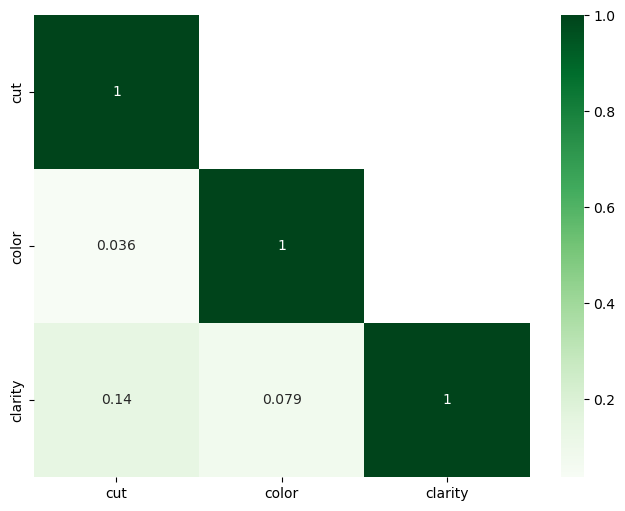

In [31]:
# code source: https://stackoverflow.com/questions/40667736/calculate-chi-sqaure-between-pairs-of-columns

from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df_categorical = df.select_dtypes(include=[object,'category'])

cat_corr= get_corr_mat(df_categorical)
fig, ax = plt.subplots(figsize=(8,6))
le_mask = np.triu(np.ones_like(cat_corr),1)
sns.heatmap(cat_corr, annot = True, cmap='Greens', mask=le_mask)
plt.show()

In [32]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

<Axes: >

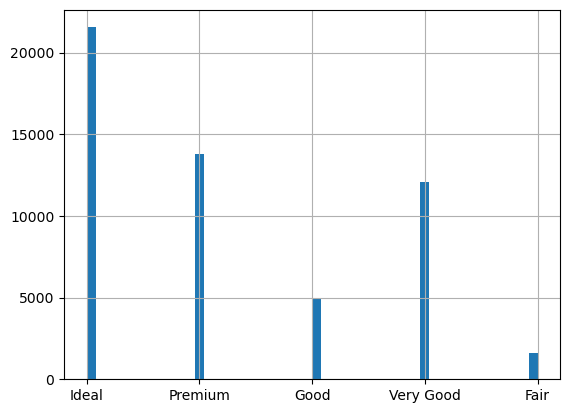

In [34]:
df['cut'].hist(bins=50)

<Axes: >

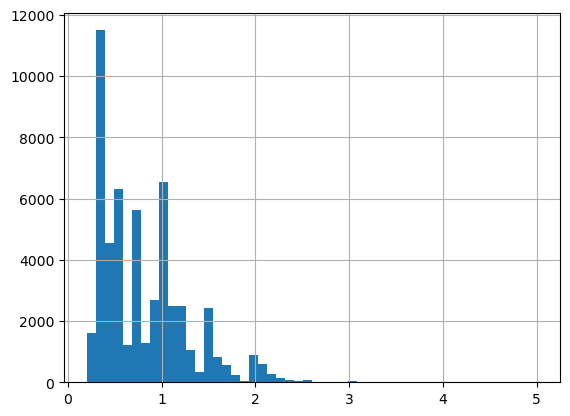

In [35]:
df['carat'].hist(bins=50)

In [36]:
stats.skew(df['carat'])

1.1166148681277797

In [37]:
stats.kurtosis(df['carat'])

1.2564076184374766

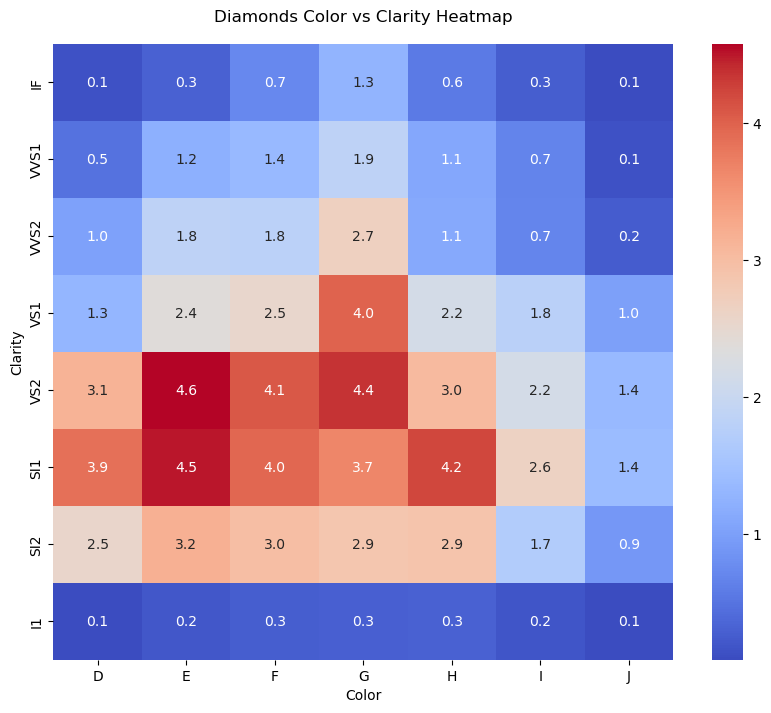

In [38]:
freq_table = pd.crosstab(df['clarity'], df['color'])

# Normalize the frequency table to get the percentage values
freq_table_percentage = freq_table / freq_table.values.sum() * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(freq_table_percentage, annot=True, cmap='coolwarm', fmt='.1f')
heatmap.set_title('Diamonds Color vs Clarity Heatmap', pad=16)
plt.xlabel('Color')
plt.ylabel('Clarity')
plt.show()

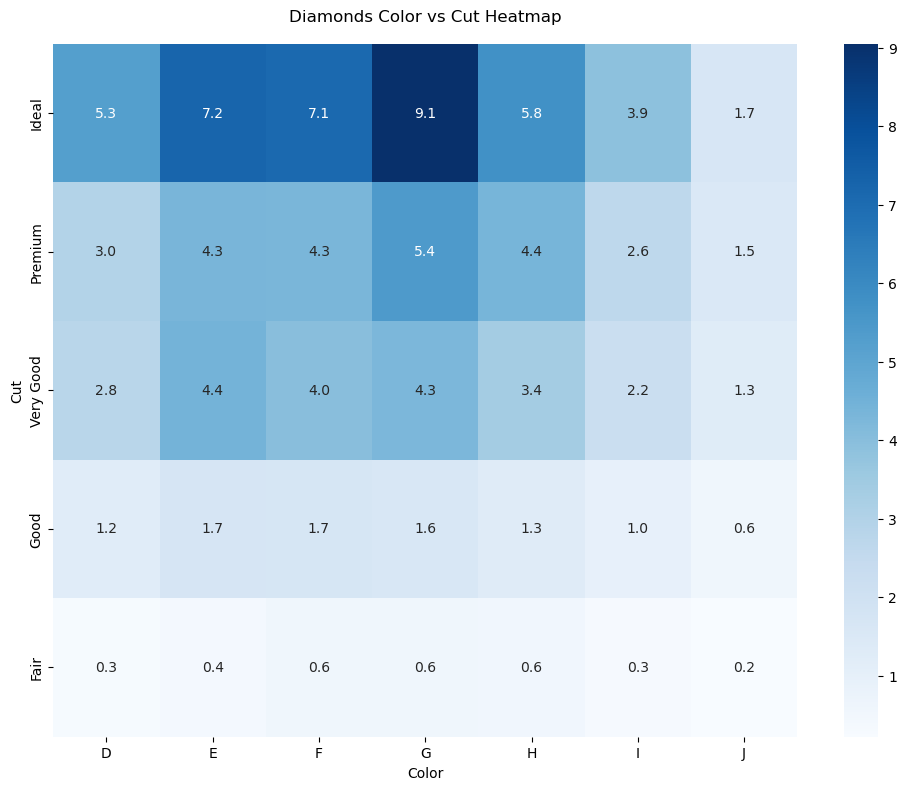

In [39]:
# Create a frequency table for color and cut
cut_color_freq_table = pd.crosstab(df['cut'], df['color'])

# Normalize the frequency table to get the percentage values
cut_color_freq_table_percentage = cut_color_freq_table / cut_color_freq_table.values.sum() * 100

# Plotting the heatmap for color and cut
plt.figure(figsize=(12, 9))
cut_color_heatmap = sns.heatmap(cut_color_freq_table_percentage, annot=True, cmap='Blues', fmt='.1f')
cut_color_heatmap.set_title('Diamonds Color vs Cut Heatmap', pad=16)
plt.xlabel('Color')
plt.ylabel('Cut')
plt.show()

MACHINE LEARNING

In [39]:
# Assigning the featurs as X and trarget as y
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [40]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [41]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -880.051495 
DecisionTree: -454.897398 
RandomForest: -330.937650 
KNeighbors: -514.074572 
XGBRegressor: -323.574952 


In [42]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [43]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9881079143775806
Adjusted R^2: 0.9880999503348243
MAE: 192.85519797939892
MSE: 107085.2394972136
RMSE: 327.2388111108057


In [2]:
df.head()

NameError: name 'data' is not defined

#More visualisations


In [41]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns

def plot_histogram_and_boxplot(df, numerical_columns, cyan_palette=["#00FFFF"]):
    # Set to "Dark" for a Black Background
    sns.set(style='dark', palette='deep')

    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_columns)*5))

    # Loop through each numerical column and create a row with a histogram and boxplot
    for i, col in enumerate(numerical_columns):

        # Histogram(Left)
        ax1 = plt.subplot(len(numerical_columns), 2, i*2+1)
        sns.histplot(df[col], kde=True, color=cyan_palette[0])
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#000133')
        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_columns), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='w', marker='o',
                                    markeredgecolor='w', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#000133')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

In [42]:
heading("Histogram and Boxplot")
plot_histogram_and_boxplot(df, df[df.columns.difference(
    ['price'])].select_dtypes(include=np.number).columns.tolist())

NameError: name 'heading' is not defined

/var/folders/jn/pqdsw5cd4ll09gfvv3n2v0kw0000gr/T/ipykernel_36581/3908448642.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['carat'], shade=True , color='r')


<Axes: xlabel='carat', ylabel='Density'>

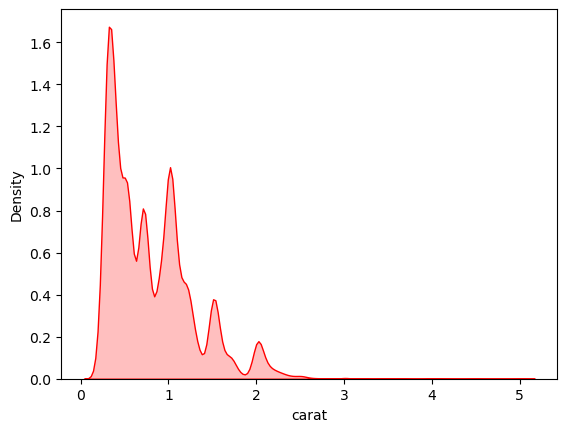

In [44]:
sns.kdeplot(df['carat'], shade=True , color='r')

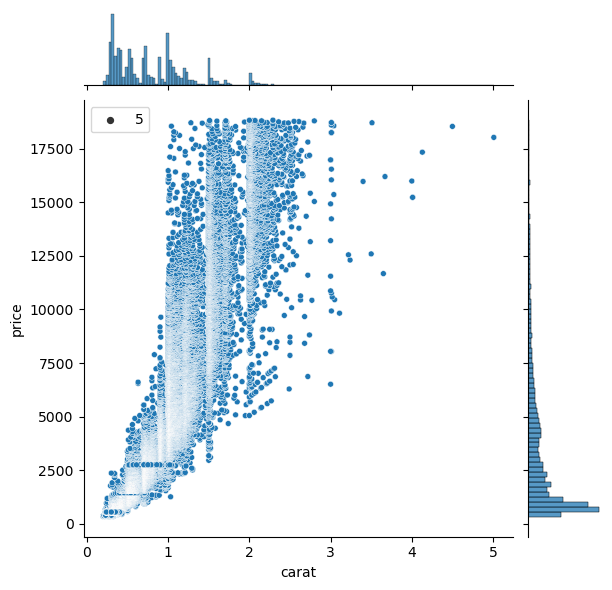

In [45]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

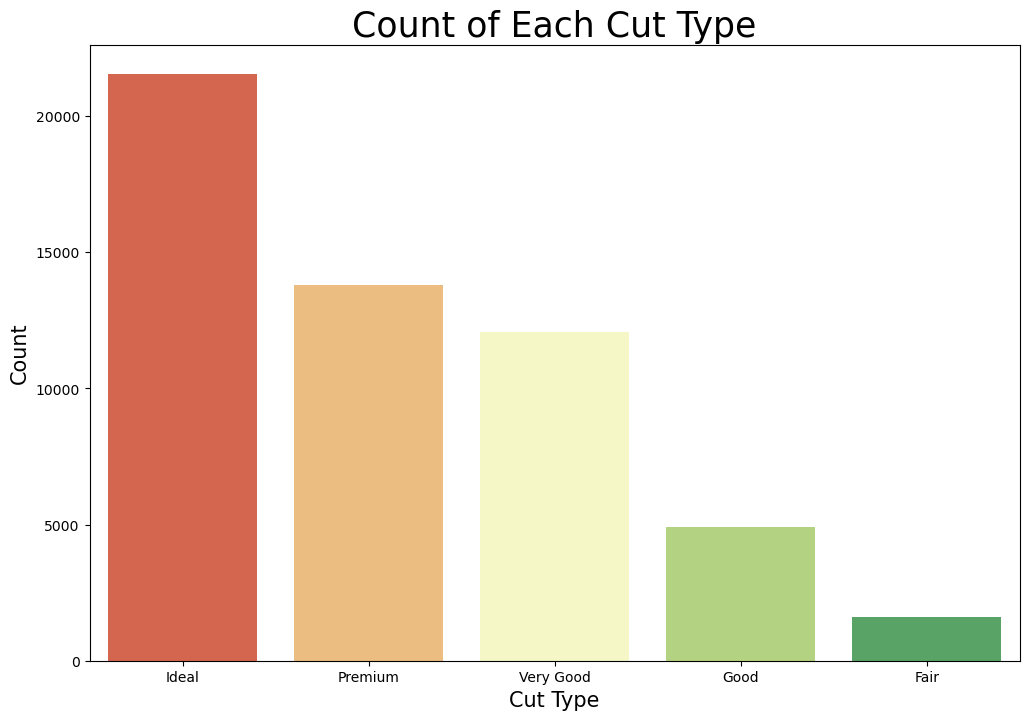

In [47]:
plt.figure(figsize=(12,8));
sns.countplot(x='cut',data=df,palette='RdYlGn');
plt.title('Count of Each Cut Type',fontsize=25,fontweight=5);
plt.xlabel('Cut Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

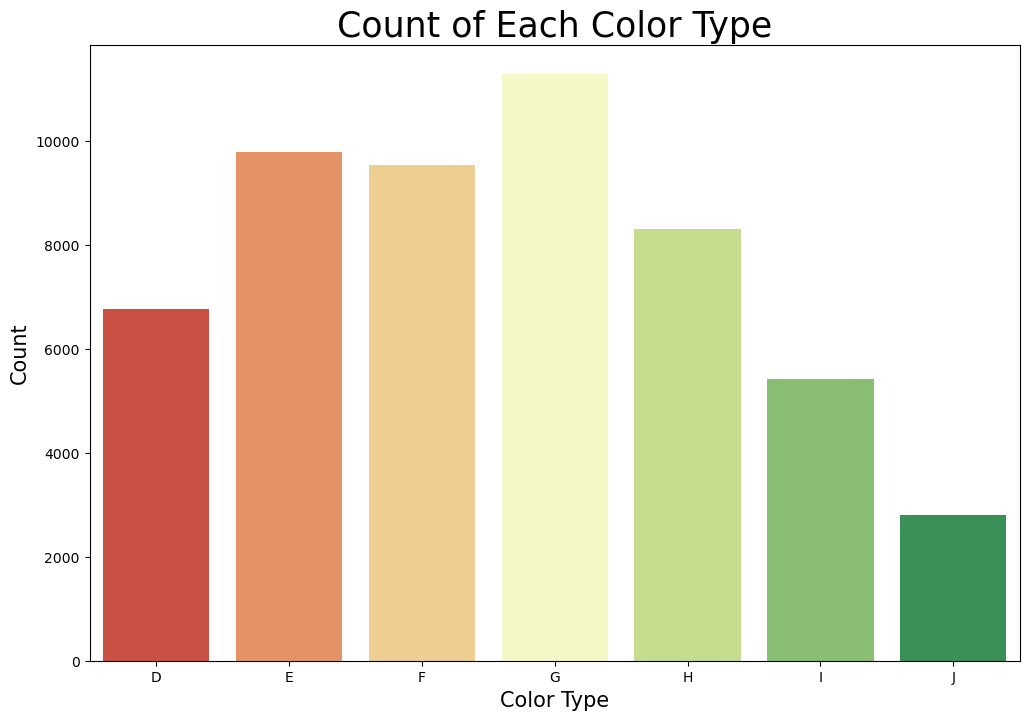

In [48]:
plt.figure(figsize=(12,8));
sns.countplot(x='color',data=df,palette='RdYlGn');
plt.title('Count of Each Color Type',fontsize=25,fontweight=5);
plt.xlabel('Color Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

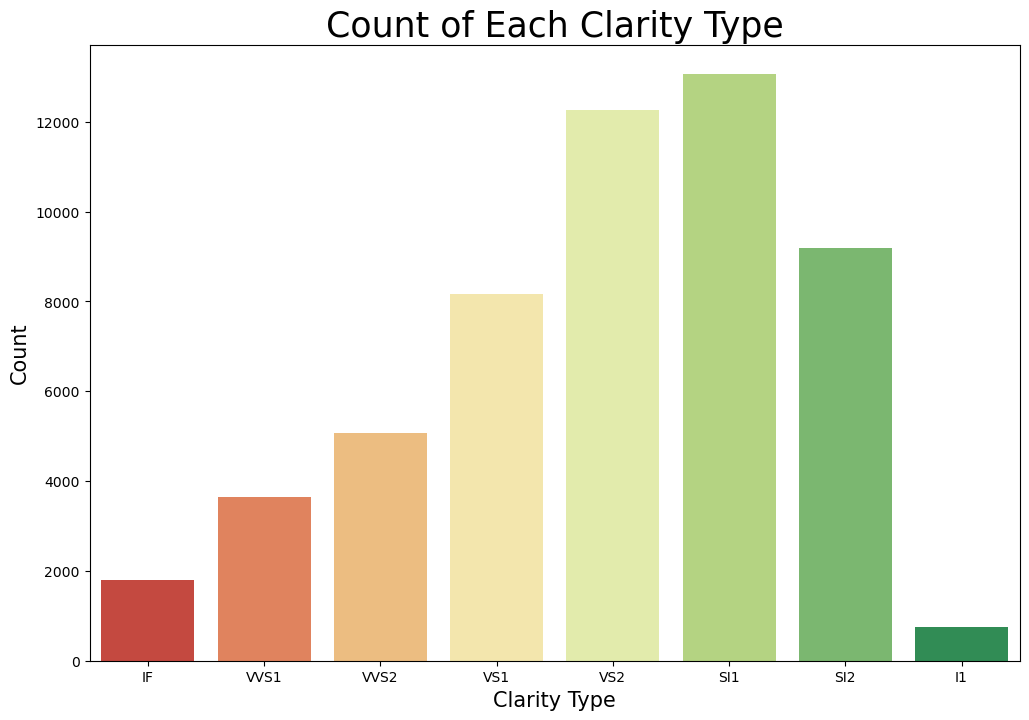

In [49]:
plt.figure(figsize=(12,8));
sns.countplot(x='clarity',data=df,palette='RdYlGn');
plt.title('Count of Each Clarity Type',fontsize=25,fontweight=5);
plt.xlabel('Clarity Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

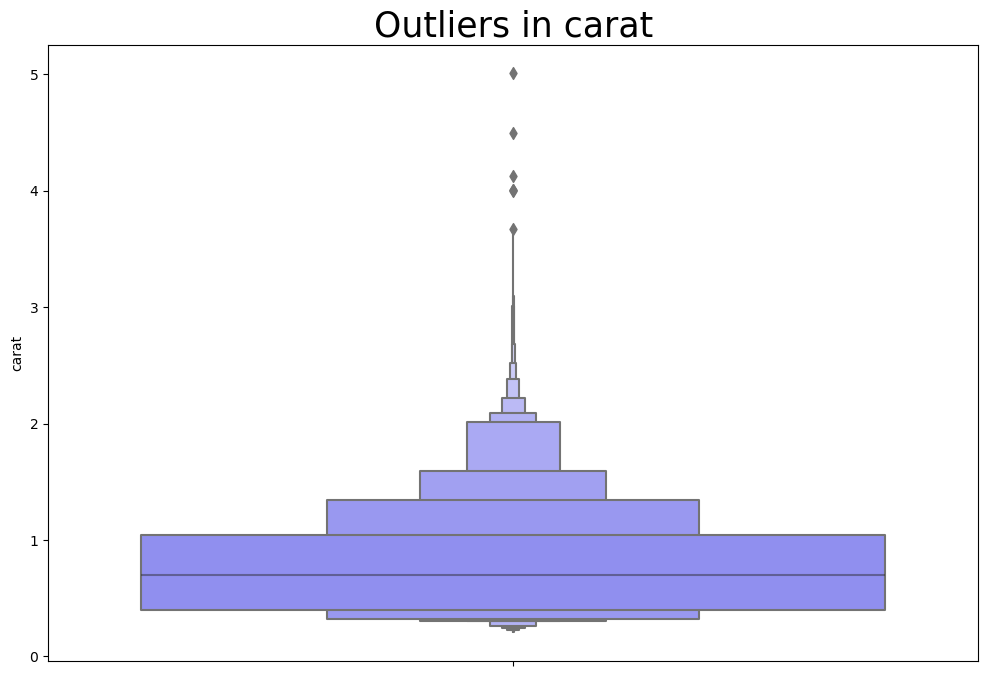

TypeError: Vertical orientation requires numeric `y` variable.

<Figure size 1200x800 with 0 Axes>

In [50]:
for col in df.columns:
    plt.figure(figsize=(12,8));
    sns.boxenplot(y=col,data=df,palette='cool');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

In [51]:
for col in df.columns:
    #calculating Q1 for the feature
    q1 = df[col].quantile(0.25)
    #calculating Q3 for the feature
    q3 = df[col].quantile(0.75)
    
    #Calculating the IQR value
    iqr = q3-q1
    # Calculating min/max value based on IQR
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr
    
    # Filtering values only in the min-max range
    df = df[(df[col] >= minn) & (df[col] <= maxx)]

AssertionError: 

TypeError: 'tuple' object is not callable